In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style='whitegrid')

In [2]:


data = pd.read_csv('./data/sierraleone-bumbuna.csv')


display(data.describe())

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:


display(data.isna().sum())
display((data.isna().sum()/len(data) * 100)[lambda x: x > 5])


cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_scores = data[cols].apply(zscore, nan_policy='omit')
display((abs(z_scores) > 3).sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Comments    100.0
dtype: float64

GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

C:\Users\blien\AppData\Local\Temp\ipykernel_15124\1259474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\blien\AppData\Local\Temp\ipykernel_15124\1259474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

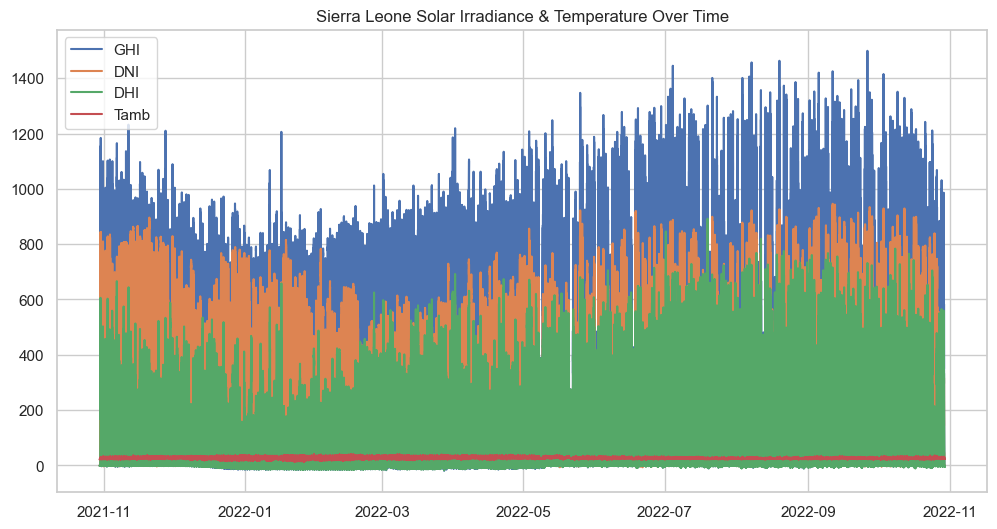

In [4]:

for col in cols:
    data[col].fillna(data[col].median(), inplace=True)


data['Timestamp'] = pd.to_datetime(data['Timestamp'])
plt.figure(figsize=(12,6))
plt.plot(data['Timestamp'], data['GHI'], label='GHI')
plt.plot(data['Timestamp'], data['DNI'], label='DNI')
plt.plot(data['Timestamp'], data['DHI'], label='DHI')
plt.plot(data['Timestamp'], data['Tamb'], label='Tamb')
plt.title("Sierra Leone Solar Irradiance & Temperature Over Time")
plt.legend()
plt.show()

In [5]:

if 'CleaningFlag' in data.columns:
    data.groupby('CleaningFlag')[['ModA','ModB']].mean().plot(kind='bar')
    plt.title("Average ModA & ModB by CleaningFlag")
    plt.show()


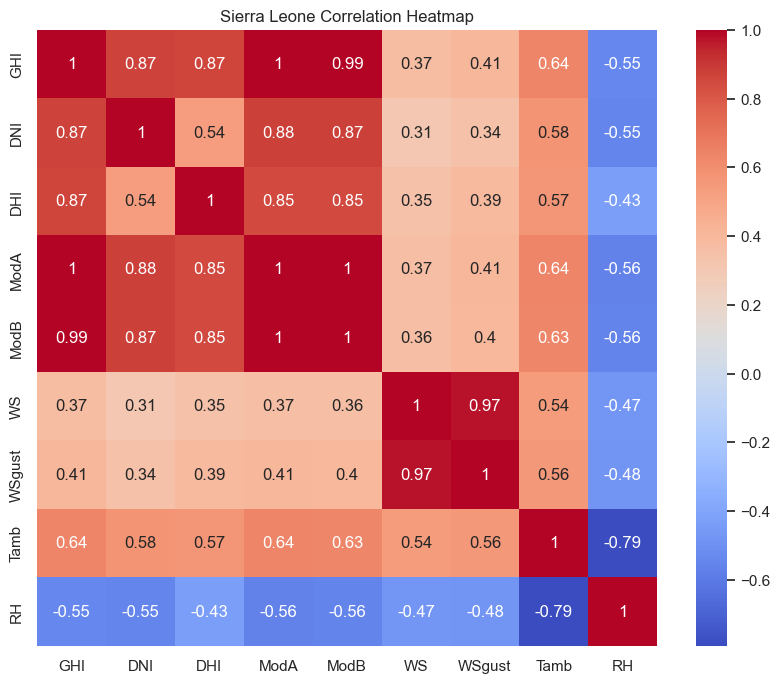

In [6]:

plt.figure(figsize=(10,8))
sns.heatmap(data[cols + ['Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.title("Sierra Leone Correlation Heatmap")
plt.show()

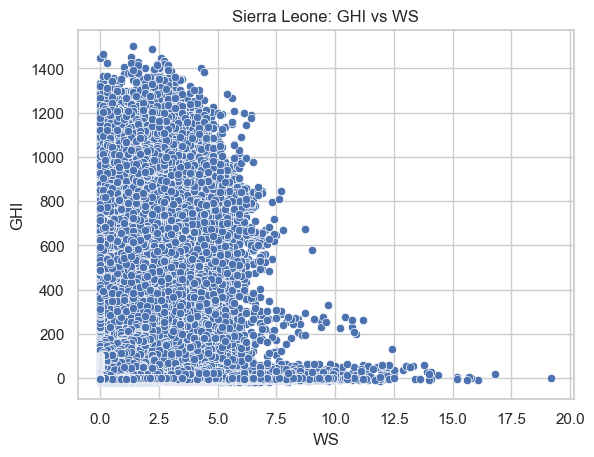

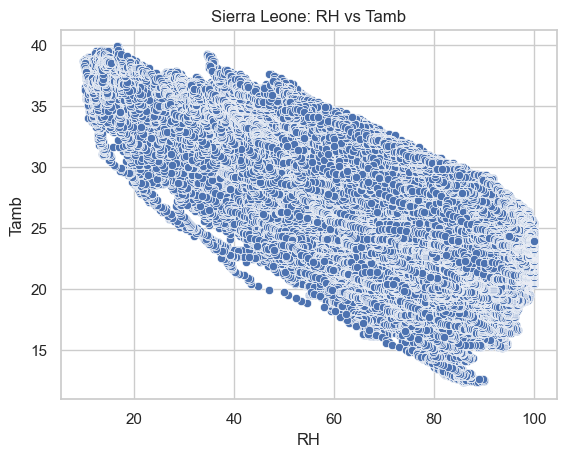

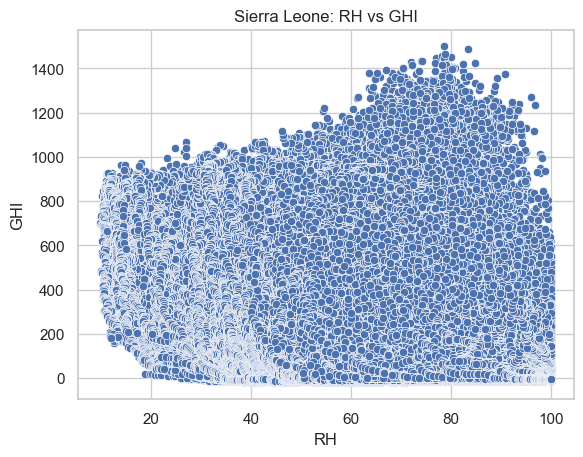

In [7]:

sns.scatterplot(x='WS', y='GHI', data=data)
plt.title("Sierra Leone: GHI vs WS")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title("Sierra Leone: RH vs Tamb")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=data)
plt.title("Sierra Leone: RH vs GHI")
plt.show()


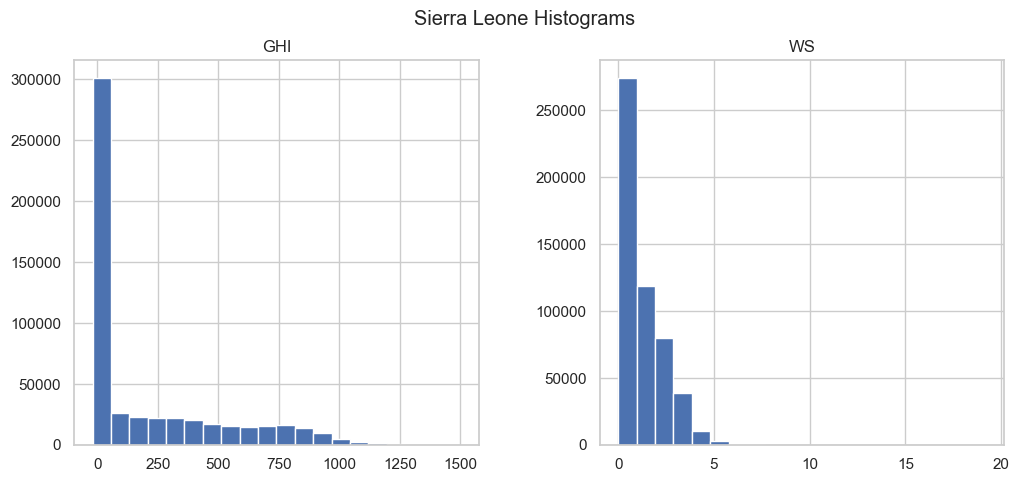

In [ ]:

data[['GHI','WS']].hist(figsize=(12,5), bins=20)
plt.suptitle("Sierra Leone Histograms")
plt.show()

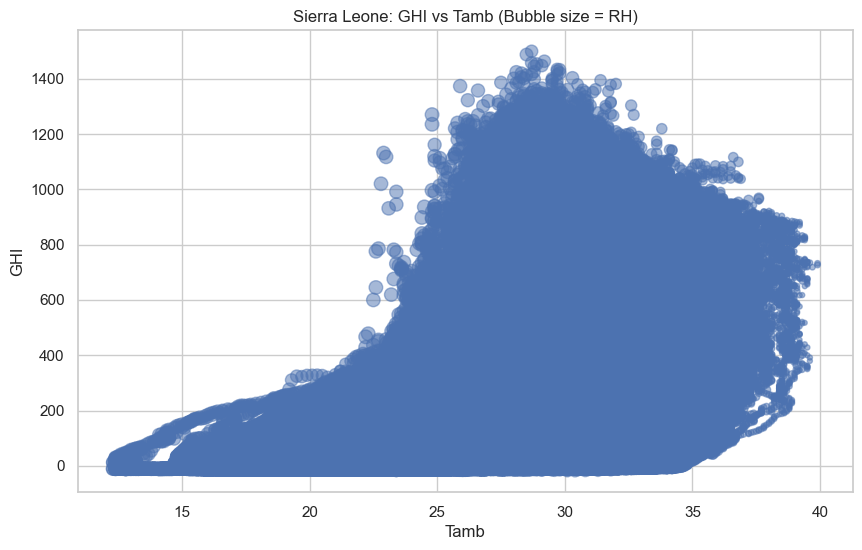

In [ ]:


plt.figure(figsize=(10,6))
plt.scatter(data['Tamb'], data['GHI'], s=data['RH'], alpha=0.5)
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title("Sierra Leone: GHI vs Tamb (Bubble size = RH)")
plt.show()